In [6]:
import numpy as np
from skimage import io
from skimage.color import rgb2hsv, rgb2lab, deltaE_ciede94, deltaE_ciede2000
from skimage.transform import resize
from skimage.measure import compare_ssim, compare_mse

In [3]:
im_size = (720, 1280)
autumn1 = resize(io.imread('pics/autumn1.jpg'), im_size)
autumn2 = resize(io.imread('pics/autumn2.jpg'), im_size)
winter1 = resize(io.imread('pics/winter1.jpeg'), im_size)
winter2 = resize(io.imread('pics/winter2.jpg'), im_size)
summer1 = resize(io.imread('pics/summer1.jpg'), im_size)
summer2 = resize(io.imread('pics/summer2.jpg'), im_size)
dog1 = resize(io.imread('pics/dog1.jpeg'), im_size)

D:\Ohjelmat\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Ohjelmat\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


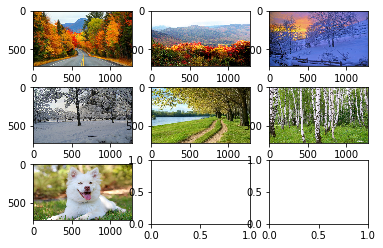

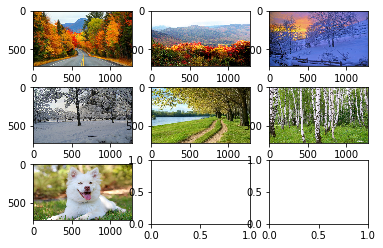

In [312]:
io.imshow_collection([autumn1, autumn2, winter1, winter2, summer1, summer2, dog1])

# Structural similarity with different color space conversions

In [7]:
from IPython.display import display as disp
""" SSim as in structural similarity.
    Point would be to transfer to a similar color space and compute the structural 
    similarity, yielding more information than just the color similarity """

def highlight_max(s):
    
    is_min = s == s.loc[s < 1].max()
    return ['background-color: yellow' if v else '' for v in is_min]

def all_ssim(color_space, cs="color_space"):
    sim  = []
    for img in color_space:
        ssims = []
        for img2 in color_space:
            ssims.append(round(compare_ssim(img, img2, multichannel=True), 3))
        sim.append(ssims)

    
    import pandas as pd
    print(cs)
    df = pd.DataFrame(sim, index=["A1", "A2", "W1", "W2", "S1", "S2", "D1"],
                columns = ["A1", "A2", "W1", "W2", "S1", "S2", "D1"])
    disp(df.style.apply(highlight_max))
    return

In [306]:
orig_color_space = [autumn1, autumn2, winter1, winter2, summer1, summer2, dog1]

In [307]:
hsv_color_space = list(map(rgb2hsv, [autumn1, autumn2, winter1, winter2, summer1, summer2, dog1]))

In [308]:
lab_color_space = list(map(rgb2lab, [autumn1, autumn2, winter1, winter2, summer1, summer2, dog1]))

In [309]:
all_ssim(orig_color_space, "Original images")
all_ssim(hsv_color_space, "HSV transformed images")
all_ssim(lab_color_space, "LAB transformed images")


D:\Ohjelmat\anaconda3\lib\site-packages\skimage\util\arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


Original images


,A1,A2,W1,W2,S1,S2,D1
A1,1,0.31,0.346,0.262,0.284,0.194,0.402
A2,0.31,1,0.37,0.203,0.243,0.185,0.457
W1,0.346,0.37,1,0.382,0.315,0.227,0.534
W2,0.262,0.203,0.382,1,0.286,0.197,0.408
S1,0.284,0.243,0.315,0.286,1,0.201,0.395
S2,0.194,0.185,0.227,0.197,0.201,1,0.261
D1,0.402,0.457,0.534,0.408,0.395,0.261,1


HSV transformed images


,A1,A2,W1,W2,S1,S2,D1
A1,1,0.231,0.36,0.253,0.366,0.241,0.445
A2,0.231,1,0.271,0.16,0.224,0.168,0.305
W1,0.36,0.271,1,0.371,0.375,0.259,0.504
W2,0.253,0.16,0.371,1,0.278,0.223,0.379
S1,0.366,0.224,0.375,0.278,1,0.282,0.439
S2,0.241,0.168,0.259,0.223,0.282,1,0.299
D1,0.445,0.305,0.504,0.379,0.439,0.299,1


LAB transformed images


,A1,A2,W1,W2,S1,S2,D1
A1,1,0.005,-0.004,-0,0.002,0,0.001
A2,0.005,1,0.002,0.001,0,0.002,-0
W1,-0.004,0.002,1,0.002,0.002,0,0.001
W2,-0,0.001,0.002,1,0.001,-0.001,0.001
S1,0.002,0,0.002,0.001,1,0,0.006
S2,0,0.002,0,-0.001,0,1,0.001
D1,0.001,-0,0.001,0.001,0.006,0.001,1


## LAB seems to perform best, below the "most similar images" by the metric
## Results are mediocre

D:\Ohjelmat\anaconda3\lib\site-packages\skimage\util\arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


LAB transformed images


,A1,A2,W1,W2,S1,S2,D1
A1,1,0.005,-0.004,-0,0.002,0,0.001
A2,0.005,1,0.002,0.001,0,0.002,-0
W1,-0.004,0.002,1,0.002,0.002,0,0.001
W2,-0,0.001,0.002,1,0.001,-0.001,0.001
S1,0.002,0,0.002,0.001,1,0,0.006
S2,0,0.002,0,-0.001,0,1,0.001
D1,0.001,-0,0.001,0.001,0.006,0.001,1


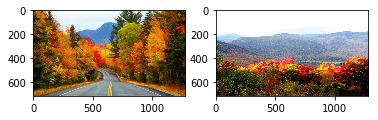

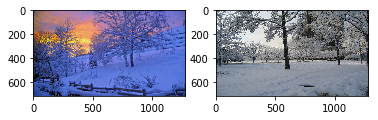

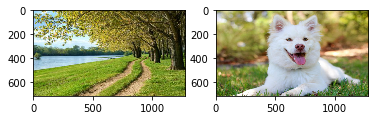

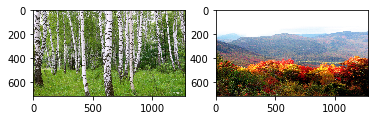

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


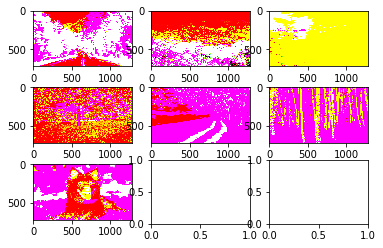

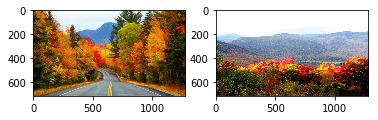

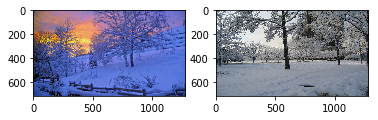

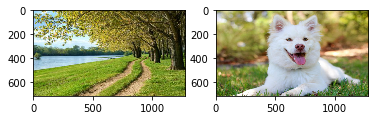

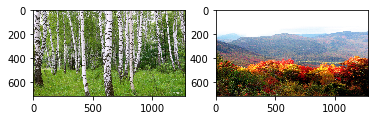

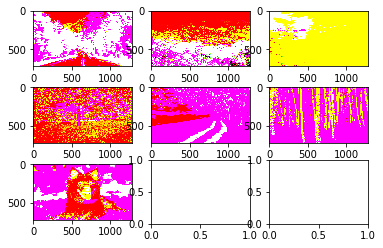

In [248]:
all_ssim(lab_color_space, "LAB transformed images")
disp(io.imshow_collection([autumn1, autumn2]))
disp(io.imshow_collection([winter1, winter2]))
disp(io.imshow_collection([summer1, dog1]))
disp(io.imshow_collection([summer2, autumn2]))
disp(io.imshow_collection(lab_color_space))

# Euclidean (or other) distance by rgb histogram

In [225]:
from PIL import Image

images = [Image.open(img) for img in ["autumn1.jpg", "autumn2.jpg", "winter1.jpeg", 
                                      "winter2.jpg", "summer1.jpg", "summer2.jpg", "dog1.jpeg"]]

In [226]:
hists = [x.histogram() for x in images]

In [10]:
from scipy.spatial import distance
df = pd.DataFrame(distance.squareform(distance.pdist(hists, metric='euclidean')),index=["A1", "A2", "W1", "W2", "S1", "S2", "D1"],
                columns = ["A1", "A2", "W1", "W2", "S1", "S2", "D1"])

def highlight_min(s):
    
    is_min = s == s.loc[s > 0].min()
    return ['background-color: yellow' if v else '' for v in is_min]

df.style.apply(highlight_min)


# Euclidean distance by "dominant" colors (top-n)

In [222]:
colors = [x.getcolors(x.size[0]*x.size[1]) for x in images]
top = []
for imcols in colors:
    top10 = sorted(imcols, key= lambda x: x[0], reverse = True)[0:10]
    top.append(list(map(lambda x: list(x[1]), top10)))

In [245]:
def customEuclidean(top):
    eucl = []
    for i in range(len(top)):
        alldist = []
        for j in range(len(top)):
            dist2 = []
            for values in zip(top[i], top[j]):
                dist2.append((values[0][0] - values[1][0])**2 + (values[0][1] - values[1][1])**2 + (values[0][2] - values[1][2])**2)
            alldist.append(sum(dist2)**(0.5))
        
        """ [0,1]-normalization
        for i in range(len(alldist)):
            alldist[i] = 1 - (alldist[i] - min(alldist)) / (max(alldist) - min(alldist))
        """
        eucl.append(alldist)
    
    return eucl

In [247]:
ecl_distances = customEuclidean(top)

df = pd.DataFrame(ecl_distances, index=["A1", "A2", "W1", "W2", "S1", "S2", "D1"],
             columns = ["A1", "A2", "W1", "W2", "S1", "S2", "D1"])

df.style.apply(highlight_min)

,A1,A2,W1,W2,S1,S2,D1
A1,0,740.925,627.711,527.2,739.928,44.4635,131.503
A2,740.925,0,719.949,649.686,797.546,749.694,703.921
W1,627.711,719.949,0,259.625,523.448,651.629,513.998
W2,527.2,649.686,259.625,0,467.411,549.612,419.627
S1,739.928,797.546,523.448,467.411,0,758.034,651.412
S2,44.4635,749.694,651.629,549.612,758.034,0,152.558
D1,131.503,703.921,513.998,419.627,651.412,152.558,0


# CIELAB DeltaE CIE94 algorithm produces pretty good results

In [11]:
def all_deltaE(color_space, cs="color_space"):
    sim  = []
    for img in color_space:
        ssims = []
        for img2 in color_space:
            ssims.append(deltaE_ciede94(img, img2).mean())
        sim.append(ssims)

    
    import pandas as pd
    print(cs)
    df = pd.DataFrame(sim, index=["A1", "A2", "W1", "W2", "S1", "S2", "D1"],
                columns = ["A1", "A2", "W1", "W2", "S1", "S2", "D1"])
    disp(df.style.apply(highlight_min))
    return

all_deltaE(lab_color_space, "LAB transformed images")

D:\Ohjelmat\anaconda3\lib\site-packages\skimage\color\delta_e.py:120: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(dE2)


LAB transformed images


,A1,A2,W1,W2,S1,S2,D1
A1,nan,37.8498,50.2434,32.4494,38.9974,37.6976,35.2852
A2,44.5405,nan,50.9786,37.9516,49.9965,41.7537,41.5569
W1,46.8197,42.7837,nan,25.0347,51.1237,46.2156,43.2077
W2,45.9756,42.9436,40.7619,nan,42.5525,39.9038,36.6281
S1,38.6239,44.7414,53.9569,29.5241,nan,28.9299,31.8418
S2,40.2659,39.0667,51.7792,29.9924,31.3157,nan,29.84
D1,38.541,38.6948,49.5367,28.8743,36.2881,30.7446,nan


In [313]:
im_size = (360, 640)
autumn1 = resize(autumn1, im_size)
autumn2 = resize(autumn2, im_size)
winter1 = resize(winter1, im_size)
winter2 = resize(winter2, im_size)
summer1 = resize(summer1, im_size)
summer2 = resize(summer2, im_size)
dog1 = resize(dog1, im_size)

lab_color_space = list(map(rgb2lab, [autumn1, autumn2, winter1, winter2, summer1, summer2, dog1]))

D:\Ohjelmat\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Ohjelmat\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [314]:
all_deltaE(lab_color_space, "LAB transformed images")

D:\Ohjelmat\anaconda3\lib\site-packages\skimage\color\delta_e.py:120: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(dE2)


LAB transformed images


,A1,A2,W1,W2,S1,S2,D1
A1,nan,37.4479,50.1091,32.0736,38.7862,37.3408,35.2065
A2,44.1741,nan,50.7383,37.5704,49.7927,41.2176,41.3805
W1,46.6898,42.5177,nan,24.5896,51.007,45.8434,43.145
W2,45.7997,42.5677,40.5503,nan,42.2135,39.2452,36.3588
S1,38.4382,44.5991,53.8379,29.0315,nan,28.4506,31.7354
S2,40.0249,38.6574,51.5456,29.2772,30.8961,nan,29.3808
D1,38.4787,38.5231,49.4641,28.4739,36.1783,30.2445,nan


In [315]:
im_size = (180, 320)
autumn1 = resize(autumn1, im_size)
autumn2 = resize(autumn2, im_size)
winter1 = resize(winter1, im_size)
winter2 = resize(winter2, im_size)
summer1 = resize(summer1, im_size)
summer2 = resize(summer2, im_size)
dog1 = resize(dog1, im_size)

lab_color_space = list(map(rgb2lab, [autumn1, autumn2, winter1, winter2, summer1, summer2, dog1]))
all_deltaE(lab_color_space, "LAB transformed images")

D:\Ohjelmat\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Ohjelmat\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
D:\Ohjelmat\anaconda3\lib\site-packages\skimage\color\delta_e.py:120: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(dE2)


LAB transformed images


,A1,A2,W1,W2,S1,S2,D1
A1,nan,37.0186,49.9412,31.4333,38.4604,36.6375,35.0242
A2,43.805,nan,50.537,37.0542,49.4622,40.4259,41.1608
W1,46.527,42.2639,nan,23.7382,50.7916,45.1772,43.0339
W2,45.4973,41.9846,40.097,nan,41.7151,38.0921,36.0092
S1,38.1001,44.315,53.5925,28.2194,nan,27.421,31.4143
S2,39.4375,38.0261,51.1127,28.0208,29.92,nan,28.5094
D1,38.298,38.2573,49.3452,27.8797,35.8791,29.2864,nan


In [12]:
im_size = (90, 160)
autumn1 = resize(io.imread('pics/autumn1.jpg'), im_size)
autumn2 = resize(io.imread('pics/autumn2.jpg'), im_size)
winter1 = resize(io.imread('pics/winter1.jpeg'), im_size)
winter2 = resize(io.imread('pics/winter2.jpg'), im_size)
summer1 = resize(io.imread('pics/summer1.jpg'), im_size)
summer2 = resize(io.imread('pics/summer2.jpg'), im_size)
dog1 = resize(io.imread('pics/dog1.jpeg'), im_size)

lab_color_space = list(map(rgb2lab, [autumn1, autumn2, winter1, winter2, summer1, summer2, dog1]))
all_deltaE(lab_color_space, "LAB transformed images")

D:\Ohjelmat\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Ohjelmat\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


LAB transformed images


D:\Ohjelmat\anaconda3\lib\site-packages\skimage\color\delta_e.py:120: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(dE2)


,A1,A2,W1,W2,S1,S2,D1
A1,nan,37.8498,50.2434,32.4494,38.9974,37.6976,35.2852
A2,44.5405,nan,50.9786,37.9516,49.9965,41.7537,41.5569
W1,46.8197,42.7837,nan,25.0347,51.1237,46.2156,43.2077
W2,45.9756,42.9436,40.7619,nan,42.5525,39.9038,36.6281
S1,38.6239,44.7414,53.9569,29.5241,nan,28.9299,31.8418
S2,40.2659,39.0667,51.7792,29.9924,31.3157,nan,29.84
D1,38.541,38.6948,49.5367,28.8743,36.2881,30.7446,nan
